# Метод опорных векторов

Подключаем необходимые библиотеки

In [1]:
import pandas
import numpy as np
from lib import SVMClassifier
from lib import accuracy_score
from lib import KFold
from lib import cross_val_score
import matplotlib.pyplot as plt

# Датасет chips.csv

Считываем данные из первого датасета, шафлим его, заменяем значения у целевой функции на +-1

In [41]:
ds = pandas.read_csv('chips.csv')
ds = ds.sample(frac=1)

positive_ds = ds[ds['class'] == 'P']
negative_ds = ds[ds['class'] == 'N']

y_train = ds['class'].replace({'P': 1, 'N': -1}).to_numpy()
ds = ds.drop(columns=['class'])
X_train = ds.to_numpy()

Параметры для подбора различных ядер

In [3]:
C = [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
power = [2, 3, 4, 5]
beta = [1, 2, 3, 4, 5]

KFold для разбиеня на k блоков

In [4]:
cv = KFold(n_splits=5)

Проводим кросс валидацию по **accuracy**, для нахождения лучшего параметра **C** при **линейном ядре**

In [5]:
accuracy_linear_score = {}
for c in C:
    clf = SVMClassifier(X_train, y_train, max_iter=30, kernel='linear', C=c)
    score = cross_val_score(model=clf, X=X_train, y=y_train, cv = cv, scoring='accuracy', show_process=False)
    accuracy_linear_score[c] = score

In [6]:
accuracy_linear_score

{0.05: 0.45760869565217394,
 0.1: 0.47427536231884054,
 0.5: 0.4826086956521739,
 1.0: 0.5076086956521739,
 5.0: 0.5072463768115941,
 10.0: 0.4826086956521739,
 50.0: 0.5003623188405797,
 100.0: 0.5347826086956522}

Лучшее **accuracy** для линейного ядра было при **C=100.0**

In [10]:
accuracy_polynomial_score = {}
for c in C:
    print("Working on C=",c,sep="")
    for p in power:
        clf = SVMClassifier(X_train, y_train, max_iter=30, kernel='polynomial', kernel_param=p, C=c)
        score = cross_val_score(model=clf, X=X_train, y=y_train, cv = cv, scoring='accuracy', show_process=False)
        accuracy_polynomial_score[(c, p)] = score

Working on C=0.05
Working on C=0.1
Working on C=0.5
Working on C=1.0
Working on C=5.0
Working on C=10.0
Working on C=50.0
Working on C=100.0


In [11]:
accuracy_polynomial_score

{(0.05, 2): 0.47427536231884054,
 (0.05, 3): 0.558695652173913,
 (0.05, 4): 0.6967391304347826,
 (0.05, 5): 0.7898550724637681,
 (0.1, 2): 0.4992753623188405,
 (0.1, 3): 0.6365942028985507,
 (0.1, 4): 0.772463768115942,
 (0.1, 5): 0.7978260869565218,
 (0.5, 2): 0.747463768115942,
 (0.5, 3): 0.7887681159420289,
 (0.5, 4): 0.8061594202898551,
 (0.5, 5): 0.8065217391304348,
 (1.0, 2): 0.8065217391304348,
 (1.0, 3): 0.7891304347826087,
 (1.0, 4): 0.8061594202898551,
 (1.0, 5): 0.8231884057971014,
 (5.0, 2): 0.8144927536231883,
 (5.0, 3): 0.8307971014492754,
 (5.0, 4): 0.7641304347826087,
 (5.0, 5): 0.7728260869565218,
 (10.0, 2): 0.8065217391304348,
 (10.0, 3): 0.788768115942029,
 (10.0, 4): 0.7637681159420289,
 (10.0, 5): 0.7807971014492754,
 (50.0, 2): 0.7532608695652174,
 (50.0, 3): 0.7380434782608696,
 (50.0, 4): 0.7286231884057971,
 (50.0, 5): 0.697463768115942,
 (100.0, 2): 0.6793478260869565,
 (100.0, 3): 0.7880434782608695,
 (100.0, 4): 0.6945652173913044,
 (100.0, 5): 0.7126811594

Лучшее **accuracy** для полиномиального ядра было при **C=5.0** , **p=3**

In [12]:
accuracy_gaussian_score = {}
for c in C:
    print("Working on C=",c,sep="")
    for b in beta:
        clf = SVMClassifier(X_train, y_train, max_iter=30, kernel='gaussian', kernel_param=b, C=c)
        score = cross_val_score(model=clf, X=X_train, y=y_train, cv = cv, scoring='accuracy', show_process=False)
        accuracy_gaussian_score[(c, b)] = score

Working on C=0.05
Working on C=0.1
Working on C=0.5
Working on C=1.0
Working on C=5.0
Working on C=10.0
Working on C=50.0
Working on C=100.0


In [13]:
accuracy_gaussian_score

{(0.05, 1): 0.47427536231884054,
 (0.05, 2): 0.47427536231884054,
 (0.05, 3): 0.48369565217391297,
 (0.05, 4): 0.5076086956521739,
 (0.05, 5): 0.47427536231884054,
 (0.1, 1): 0.47427536231884054,
 (0.1, 2): 0.5246376811594202,
 (0.1, 3): 0.6195652173913043,
 (0.1, 4): 0.5420289855072464,
 (0.1, 5): 0.55,
 (0.5, 1): 0.7471014492753624,
 (0.5, 2): 0.755072463768116,
 (0.5, 3): 0.7717391304347826,
 (0.5, 4): 0.7800724637681159,
 (0.5, 5): 0.7626811594202898,
 (1.0, 1): 0.7554347826086956,
 (1.0, 2): 0.7804347826086957,
 (1.0, 3): 0.8057971014492752,
 (1.0, 4): 0.8144927536231883,
 (1.0, 5): 0.7634057971014492,
 (5.0, 1): 0.8141304347826086,
 (5.0, 2): 0.8144927536231883,
 (5.0, 3): 0.8057971014492754,
 (5.0, 4): 0.8061594202898551,
 (5.0, 5): 0.7981884057971014,
 (10.0, 1): 0.8068840579710145,
 (10.0, 2): 0.8065217391304348,
 (10.0, 3): 0.7894927536231884,
 (10.0, 4): 0.7463768115942029,
 (10.0, 5): 0.763768115942029,
 (50.0, 1): 0.7626811594202898,
 (50.0, 2): 0.7460144927536232,
 (50.0,

Лучшее **accuracy** для полиномиального ядра было при **C=1.0** , **p=4**

In [39]:
def draw_graphic(X, y, positive_ds, negative_ds, kernel, C, kernel_param):
    clf = SVMClassifier(X, y, 100, kernel=kernel, C=C, kernel_param=kernel_param)
    clf.fit()
    accuracy = accuracy_score(np.sign(clf.predict(X_train)), y_train)

    fig, ax = plt.subplots()
    ax.scatter(positive_ds['x'], positive_ds['y'], c='#ff0000')
    ax.scatter(negative_ds['x'], negative_ds['y'], c='#0000ff')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = clf.predict(xy)
    Z = np.array(Z).reshape(XX.shape)

    ax.contourf(XX, YY, Z, levels=[-100, 0, 100], alpha=0.2, colors=['#0000ff','#ff0000'])

    ax.contour(XX, YY, Z, levels=[-1, 0, 1], alpha=1,
               linestyles=['--', '-', '--'], colors='k')

    support_vectors = np.array(clf.support_vectors())

    ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

    plt.xlabel('x')
    plt.ylabel('y')
    title = kernel + " kernel     C=" + str(C)
    if kernel != 'linear':
        title = title + "    param=" + str(kernel_param)
    title += "    Accuracy = " + str(accuracy)
    plt.title(title)

    plt.show()

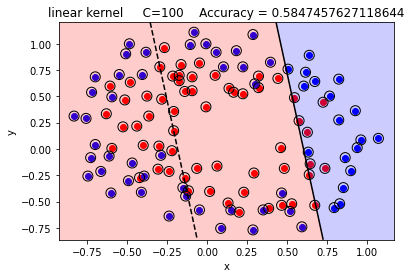

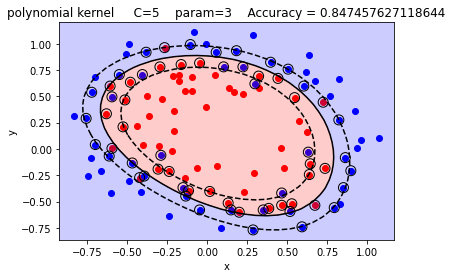

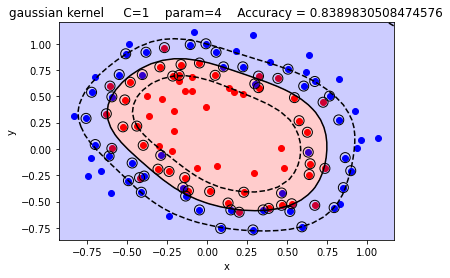

In [42]:
draw_graphic(X_train, y_train, positive_ds, negative_ds, 'linear', 100, 1)
draw_graphic(X_train, y_train, positive_ds, negative_ds, 'polynomial', 5, 3)
draw_graphic(X_train, y_train, positive_ds, negative_ds, 'gaussian', 1, 4)

# Датасет geyser.csv

Считываем данные из второго датасета, шафлим его, заменяем значения у целевой функции на +-1

In [28]:
ds = pandas.read_csv('geyser.csv')
ds = ds.sample(frac=1)

positive_ds = ds[ds['class'] == 'P']
negative_ds = ds[ds['class'] == 'N']

y_train = ds['class'].replace({'P': 1, 'N': -1}).to_numpy()
ds = ds.drop(columns=['class'])
X_train = ds.to_numpy()

In [29]:
accuracy_linear_score = {}
for c in C:
    print("Working on C=",c,sep="")
    clf = SVMClassifier(X_train, y_train, max_iter=30, kernel='linear', C=c)
    score = cross_val_score(model=clf, X=X_train, y=y_train, cv = cv, scoring='accuracy', show_process=False)
    accuracy_linear_score[c] = score

Working on C=0.05
Working on C=0.1
Working on C=0.5
Working on C=1.0
Working on C=5.0
Working on C=10.0
Working on C=50.0
Working on C=100.0


In [30]:
accuracy_linear_score

{0.05: 0.9007070707070707,
 0.1: 0.8917171717171717,
 0.5: 0.8962626262626262,
 1.0: 0.887070707070707,
 5.0: 0.8642424242424243,
 10.0: 0.8600000000000001,
 50.0: 0.7971717171717172,
 100.0: 0.6554545454545455}

Лучшее **accuracy** для линейного ядра было при **C=0.05**

In [32]:
accuracy_polynomial_score = {}
for c in C:
    print("Working on C=",c,sep="")
    for p in power:
        clf = SVMClassifier(X_train, y_train, max_iter=30, kernel='polynomial', kernel_param=p, C=c)
        score = cross_val_score(model=clf, X=X_train, y=y_train, cv = cv, scoring='accuracy', show_process=False)
        accuracy_polynomial_score[(c, p)] = score

Working on C=0.05
Working on C=0.1
Working on C=0.5
Working on C=1.0
Working on C=5.0
Working on C=10.0
Working on C=50.0
Working on C=100.0


In [33]:
accuracy_polynomial_score

{(0.05, 2): 0.8281818181818181,
 (0.05, 3): 0.6614141414141415,
 (0.05, 4): 0.6838383838383839,
 (0.05, 5): 0.5911111111111111,
 (0.1, 2): 0.7790909090909091,
 (0.1, 3): 0.6539393939393939,
 (0.1, 4): 0.7532323232323233,
 (0.1, 5): 0.6754545454545454,
 (0.5, 2): 0.8144444444444444,
 (0.5, 3): 0.6986868686868687,
 (0.5, 4): 0.6573737373737374,
 (0.5, 5): 0.6349494949494949,
 (1.0, 2): 0.7786868686868686,
 (1.0, 3): 0.5415151515151516,
 (1.0, 4): 0.6709090909090909,
 (1.0, 5): 0.6441414141414141,
 (5.0, 2): 0.6144444444444445,
 (5.0, 3): 0.6841414141414142,
 (5.0, 4): 0.6753535353535354,
 (5.0, 5): 0.657070707070707,
 (10.0, 2): 0.6570707070707071,
 (10.0, 3): 0.6848484848484848,
 (10.0, 4): 0.7828282828282829,
 (10.0, 5): 0.7291919191919193,
 (50.0, 2): 0.5276767676767677,
 (50.0, 3): 0.7203030303030303,
 (50.0, 4): 0.604040404040404,
 (50.0, 5): 0.5983838383838384,
 (100.0, 2): 0.7426262626262627,
 (100.0, 3): 0.6618181818181817,
 (100.0, 4): 0.628989898989899,
 (100.0, 5): 0.652626262

Лучшее **accuracy** для полиномиального ядра было при **C=0.05** **p=2**

In [34]:
accuracy_gaussian_score = {}
for c in C:
    print("Working on C=",c,sep="")
    for b in beta:
        clf = SVMClassifier(X_train, y_train, max_iter=30, kernel='gaussian', kernel_param=b, C=c)
        score = cross_val_score(model=clf, X=X_train, y=y_train, cv = cv, scoring='accuracy', show_process=False)
        accuracy_gaussian_score[(c, b)] = score

Working on C=0.05
Working on C=0.1
Working on C=0.5
Working on C=1.0
Working on C=5.0
Working on C=10.0
Working on C=50.0
Working on C=100.0


In [35]:
accuracy_gaussian_score

{(0.05, 1): 0.6037373737373738,
 (0.05, 2): 0.6037373737373738,
 (0.05, 3): 0.6037373737373738,
 (0.05, 4): 0.6037373737373738,
 (0.05, 5): 0.6037373737373738,
 (0.1, 1): 0.6761616161616162,
 (0.1, 2): 0.6037373737373738,
 (0.1, 3): 0.6037373737373738,
 (0.1, 4): 0.6037373737373738,
 (0.1, 5): 0.6037373737373738,
 (0.5, 1): 0.8961616161616162,
 (0.5, 2): 0.8917171717171717,
 (0.5, 3): 0.8735353535353536,
 (0.5, 4): 0.8735353535353536,
 (0.5, 5): 0.8690909090909091,
 (1.0, 1): 0.8961616161616162,
 (1.0, 2): 0.8871717171717173,
 (1.0, 3): 0.8736363636363637,
 (1.0, 4): 0.86,
 (1.0, 5): 0.86,
 (5.0, 1): 0.8825252525252527,
 (5.0, 2): 0.878080808080808,
 (5.0, 3): 0.86,
 (5.0, 4): 0.850909090909091,
 (5.0, 5): 0.8509090909090908,
 (10.0, 1): 0.8780808080808082,
 (10.0, 2): 0.8689898989898991,
 (10.0, 3): 0.8554545454545455,
 (10.0, 4): 0.8418181818181818,
 (10.0, 5): 0.8463636363636364,
 (50.0, 1): 0.8241414141414142,
 (50.0, 2): 0.7836363636363637,
 (50.0, 3): 0.8058585858585857,
 (50.0, 

Лучшее **accuracy** для гауссова ядра было при **C=0.5** **p=1**

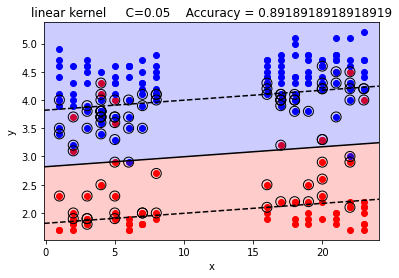

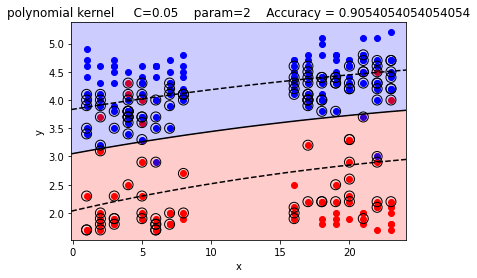

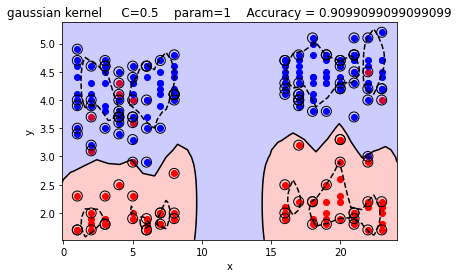

In [40]:
draw_graphic(X_train, y_train, positive_ds, negative_ds, 'linear', 0.05, 1)
draw_graphic(X_train, y_train, positive_ds, negative_ds, 'polynomial', 0.05, 2)
draw_graphic(X_train, y_train, positive_ds, negative_ds, 'gaussian', 0.5, 1)